# Malware Detection using ML

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [11]:
df = pd.read_csv(r'C:\Users\eprmitr\Desktop\Blogs\AI-ML\MalwareData.csv', sep = '|')

In [5]:
print("The sample size of the dataset is:",df.shape[0],"rows and ", df.shape[1], "features")

The sample size of the dataset is: 138047 rows and  57 features


In [6]:
df.head()

Name                               md5  Machine  \
0   memtest.exe  631ea355665f28d4707448e442fbf5b8      332   
1       ose.exe  9d10f99a6712e28f8acd5641e3a7ea6b      332   
2     setup.exe  4d92f518527353c0db88a70fddcfd390      332   
3      DW20.EXE  a41e524f8d45f0074fd07805ff0c9b12      332   
4  dwtrig20.exe  c87e561258f2f8650cef999bf643a731      332   

   SizeOfOptionalHeader  Characteristics  MajorLinkerVersion  \
0                   224              258                   9   
1                   224             3330                   9   
2                   224             3330                   9   
3                   224              258                   9   
4                   224              258                   9   

   MinorLinkerVersion  SizeOfCode  SizeOfInitializedData  \
0                   0      361984                 115712   
1                   0      130560                  19968   
2                   0      517120                 621568   
3                   0      585728                 369152   
4                   0      294912                 247296   

   SizeOfUninitializedData  ...  ResourcesNb  ResourcesMeanEntropy  \
0                        0  ...            4              3.262823   
1                        0  ...            2              4.250461   
2                        0  ...           11              4.426324   
3                        0  ...           10              4.364291   
4                        0  ...            2              4.306100   

   ResourcesMinEntropy  ResourcesMaxEntropy  ResourcesMeanSize  \
0             2.568844             3.537939        8797.000000   
1             3.420744             5.080177         837.000000   
2             2.846449             5.271813       31102.272727   
3             2.669314             6.400720        1457.000000   
4             3.421598             5.190603        1074.500000   

   ResourcesMinSize  ResourcesMaxSize  LoadConfigurationSize  \
0               216             18032                      0   
1               518              1156                     72   
2               104            270376                     72   
3                90              4264                     72   
4               849              1300                     72   

   VersionInformationSize  legitimate  
0                      16           1  
1                      18           1  
2                      18           1  
3                      18           1  
4                      18           1  

[5 rows x 57 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
Name                           138047 non-null object
md5                            138047 non-null object
Machine                        138047 non-null int64
SizeOfOptionalHeader           138047 non-null int64
Characteristics                138047 non-null int64
MajorLinkerVersion             138047 non-null int64
MinorLinkerVersion             138047 non-null int64
SizeOfCode                     138047 non-null int64
SizeOfInitializedData          138047 non-null int64
SizeOfUninitializedData        138047 non-null int64
AddressOfEntryPoint            138047 non-null int64
BaseOfCode                     138047 non-null int64
BaseOfData                     138047 non-null int64
ImageBase                      138047 non-null float64
SectionAlignment               138047 non-null int64
FileAlignment                  138047 non-null int64
MajorOperatingSystemVersion    138047

In [ ]:
df.legitimate.value_counts()

In [13]:
print("There are", df[df['legitimate']==True].count()['legitimate'], 'legit files and',df[df['legitimate']==False].count()['legitimate'], 'malware files present in the dataset')
#df[df['legitimate']=='0']

There are 41323 legit files and 96724 malware files present in the dataset


# Data Exploration

In [19]:
df.Name,df.md5

(0                                         memtest.exe
 1                                             ose.exe
 2                                           setup.exe
 3                                            DW20.EXE
 4                                        dwtrig20.exe
 5                                 airappinstaller.exe
 6                                      AcroBroker.exe
 7                                        AcroRd32.exe
 8                                    AcroRd32Info.exe
 9                               AcroTextExtractor.exe
 10                                AdobeCollabSync.exe
 11                                           Eula.exe
 12                                  LogTransport2.exe
 13                                      reader_sl.exe
 14                                 AcrobatUpdater.exe
 15                                       AdobeARM.exe
 16                                         armsvc.exe
 17                                  ReaderUpdater.exe
 18       

It's observed that the "Name" and "md5" features are having string types, and only legitimate samples have prpoer "Name" otherwise both of these features are filled with junk characters, need to be dropped.

In [20]:
df = df.drop(['Name'], axis=1)
df = df.drop(['md5'], axis=1)

In [21]:
df.columns

Index(['Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'ImportsNbOrdinal', '

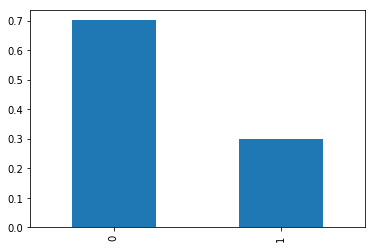

In [22]:
df.legitimate.value_counts(normalize=True).plot(kind='bar')

# Correlation analysis

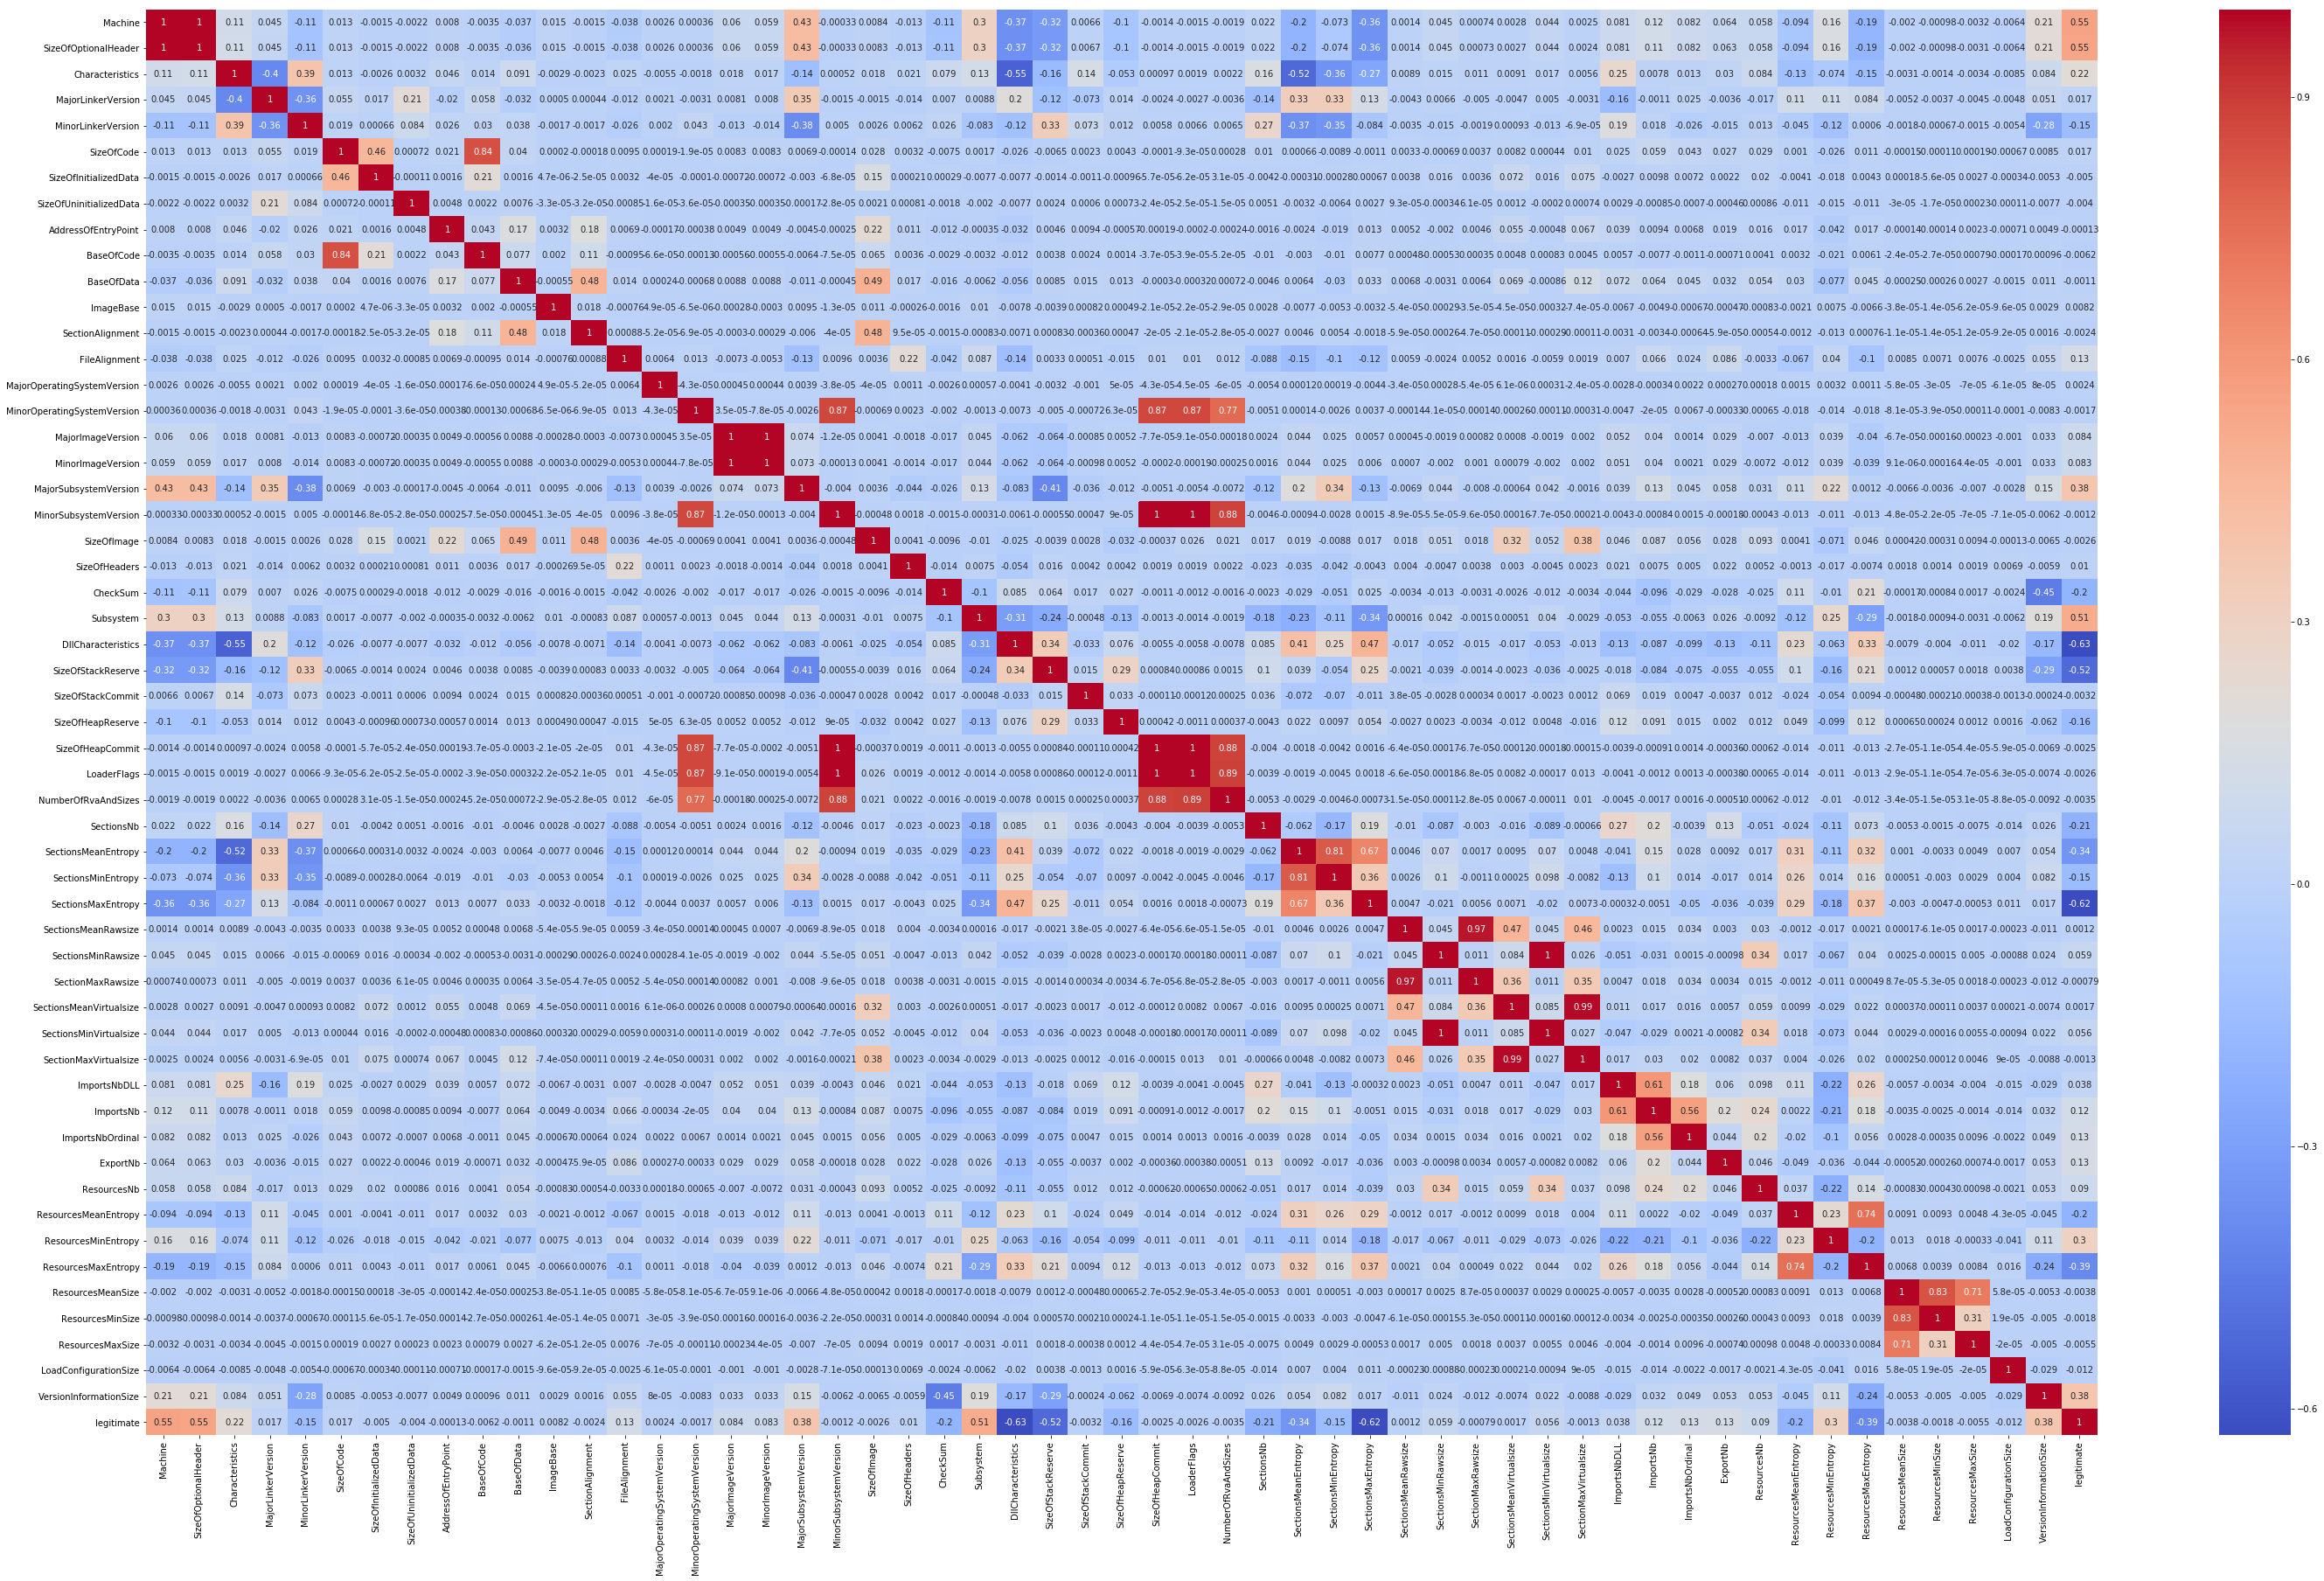

In [23]:
cor = df.corr()
plt.figure(figsize=(50,30))
sns.heatmap(cor,cmap='coolwarm',annot=True)
plt.show()

# Data Preparation

In [35]:
Y = df.legitimate
X = df.drop(['legitimate'], axis = 1)

### splitting data in training and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)


### Shape of the training and test set
print("X_train,X_test,Y_train,Y_test shapes are as below:")
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

X_train,X_test,Y_train,Y_test shapes are as below:


((103535, 54), (34512, 54), (103535,), (34512,))

# Scaling of features

In [36]:
#Scaling the data on target and feature variables 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)
print(len(scaled))
#scaled

C:\Users\eprmitr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


138047


In [38]:
rforest= RandomForestClassifier(criterion='entropy')
rforest.fit(X_train,Y_train)
y_pred = rforest.predict(X_test)
cnf_matrix_rforest = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix :") 
print(cnf_matrix_rforest)

print ("Train Accuracy :: ", accuracy_score(Y_train, rforest.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(Y_test, y_pred))


C:\Users\eprmitr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix :
[[24175    95]
 [   80 10162]]
Train Accuracy ::  0.999623315786932
Test Accuracy  ::  0.9949292999536393
